In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pandas as pd
from datetime import datetime as dt

import altair as alt
import numpy as np
import seaborn as sns
from pprint import pprint


import random
from matplotlib.patches import Patch
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
data_path='./data/genre_listen_counts.csv'

#load df and convert the index (time) to datetime objects
genre_counts=pd.read_csv(data_path, index_col=0).T
genre_counts.index=pd.to_datetime(genre_counts.index)

---
#### Summation of per day listening for each genre:

In [5]:
DAILY_COUNTS=genre_counts.groupby(pd.Grouper(freq='1D'))
DAILY_DF=pd.DataFrame(index=genre_counts.T.index)
DAILY_LIST=[]

for day_i, day_df in DAILY_COUNTS:
    day_sum=day_df.sum()
    
    #convert from ms to hour --> 1000 (ms per s), 60 (s per min), 60 (min per hr)
    DAILY_DF[day_i]=(day_sum.values)/1000/60/60


---

### Custom genres to put into heatmap
- these were semi-custom - I found the top genres for each month and choose one for each so that were no duplicates
- So these genres only apply to my dataset

In [7]:
custom_top_genres=['Rock',
 'Permanent Wave',
 'Indie Rock',
 'Freak Folk',
 'Stoner Rock',
 'Post-Doom Metal',
 'Nu Gaze',
 'Alternative Metal',
 'Drone Metal',
 'Sludge Metal',
 'Chamber Psych',
 'Post-Hardcore']

---
## Heatmap Plotting Function

In [11]:
def heat_map(target_DFs, target_genres, fig_size, fnt_size, font, ignore_x=False, save=None, save_format='eps', cmap=plt.cm.twilight_shifted):
'''
taget_DFS -- list of the dataframe(s) to be plotted (1 or more)
target_genres -- list of genres that you want to pull from the dataframe and plot
fig_size -- tuple of figure size (width, length)
fnt_size -- float size of the figure fonts
font -- string font name
ignore_x -- plot without the genre labels
save -- string name of the file if you want to save
save_format -- string name of file format type (default eps)
cmap -- the colormap class to use
'''
    
    

    fig, axs = plt.subplots(figsize=fig_size, ncols=len(target_DFs), nrows=1, facecolor='w', edgecolor='k')

    # handling for 1 or more dataframes to plot - placing them into the subplot axs
    if len(target_DFs)==1:
        axs=[axs]
    for i, (targ, ax) in enumerate(zip(target_DFs, axs)):
        targ_i=targ.loc[target_genres].T
        l=list(targ_i.T.index)


        s=sns.heatmap(targ_i, ax=ax, cmap=cmap, cbar_kws={"shrink": 1,'aspect':40})
        cbar = s.collections[0].colorbar

        #customizing the color bar for it to stretch over the entire length of the heatmap
        cbar.set_ticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontfamily=font)
        cbar.ax.tick_params(labelsize=fnt_size)
        cbar.ax.invert_yaxis()


        ax.xaxis.tick_top()


        #place major ticks at the begining of each month and minor ticks (the name of the month) at the mid point (16 days is close enough to handle all months)
        ax.yaxis.set_major_locator(mdates.MonthLocator())
        ax.yaxis.set_minor_locator(mdates.MonthLocator(bymonthday=16))

        ax.yaxis.set_major_formatter(ticker.NullFormatter())
        ax.yaxis.set_minor_formatter(mdates.DateFormatter('%b'))

        #customizing the formating of month ticks
        for tick in ax.yaxis.get_minor_ticks():
            tick.tick1line.set_markersize(0)
            tick.tick2line.set_markersize(0)
            tick.label1.set_horizontalalignment('center')
            tick.label1.set_fontfamily(font)

            tick.label1.set_fontsize(fnt_size)
            tick.label1.set_x(-0.05)

        #if we want to remove the x-axis
        if ignore_x:
            ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
            ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))


            ax.xaxis.set_major_formatter(ticker.NullFormatter())
            ax.xaxis.set_minor_formatter(ticker.NullFormatter())

        #setting locations for x axis ticks of genres
        else:  
            ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
            ax.xaxis.set_minor_locator(ticker.FixedLocator(np.arange(0, len(l), 0.5)))


            ax.xaxis.set_major_formatter(ticker.NullFormatter())
            ax.xaxis.set_minor_formatter(ticker.FixedFormatter(l))

            #customizing the formating of genre ticks (top x axis)
            for tick in ax.xaxis.get_minor_ticks():
                tick.tick1line.set_markersize(0)
                tick.tick2line.set_markersize(0)

                tick.label2.set_horizontalalignment('left')
                tick.label2.set_verticalalignment('baseline')
                tick.label2.set_fontfamily(font)

                tick.label2.set_fontsize(fnt_size)
                tick.label2.set_rotation_mode('anchor')
                tick.label2.set_rotation(45)

            ax.tick_params(direction='out', length=5, width=1, colors='black')

    if save:
        plt.tight_layout()
        plt.savefig(f'./figs/{save}.{save_format}', format=save_format, dpi=600)

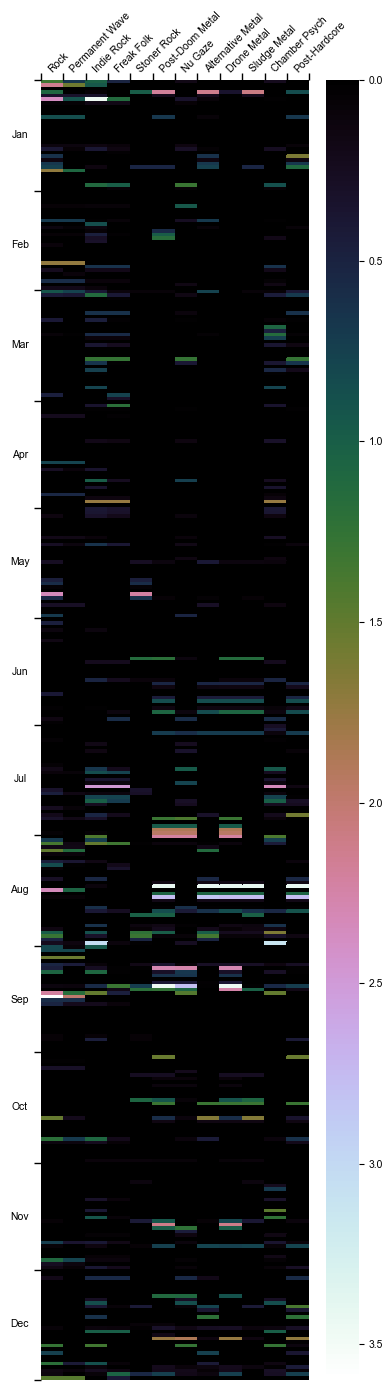

In [44]:
fig_size=(4,14)
hm=heat_map(target_DFs=[DAILY_DF], target_genres=custom_top, fig_size=fig_size, fnt_size=7.5 ,font='Arial', ignore_x=False, cmap=plt.cm.cubehelix, save='subplot_jpeg', save_format='jpeg')

---
### Changing image and boarder to fit the requirements (size and file format) of the printing company.

In [48]:
from PIL import Image

old_im = Image.open('./figs/subplot_jpeg.jpeg')
old_size = old_im.size


#### CANNOT CHANGE --> MAT WILL BE FOR SIZE 5x15
new_size=((old_size[0]+600), (old_size[1]+600))

#new_size = (800, 800)
new_im = Image.new(old_im.mode, new_size, color='white')
new_im.paste(old_im, (300,300))

#new_im.show()
new_im.save('./figs/plot.pdf', format='pdf',dpi=(600,600))

(2400, 8400)
RGB
